In [2]:
import numpy as np
from matplotlib import pyplot as plt

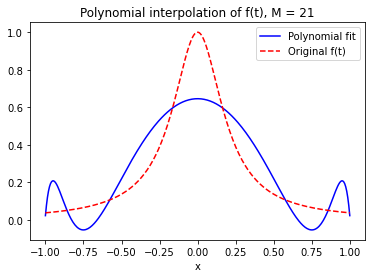

In [3]:
# Question 4(a)

# Define function
f_runge = lambda x: 1/(1 + 25 * x**2) 

# Define comparison
xx = np.linspace(-1, 1, 300)
ff = f_runge(xx)

error = []

# Plot results for M = 21
M = 21
x = np.linspace(-1, 1, M)
y = f_runge(x)

X = np.zeros((M,M))
for i in np.arange(M):
    X[:,i] = x ** i
    
U, S, Vt = np.linalg.svd(X)
R = 7
#print (y[0:R].shape)
ahat =  np.transpose(Vt[0:R]) @ np.linalg.inv(S[0:R] * np.eye(R)) @ np.transpose(U)[0:R] @ y

XX = np.zeros((xx.size,M))
for i in np.arange(M):
    XX[:,i] = xx ** i

yy = XX @ ahat

plt.clf()
plt.plot(xx, yy, 'b')
plt.plot(xx, ff, 'r--' )
plt.xlabel('x')
plt.title('Polynomial interpolation of f(t), M = {}'.format(M))
plt.legend(('Polynomial fit','Original f(t)'))
#best value of R' appears to be around 19

For R' = 7, the results are similar to M = 7 from 7c on homework 2, just at a lesser scale. 

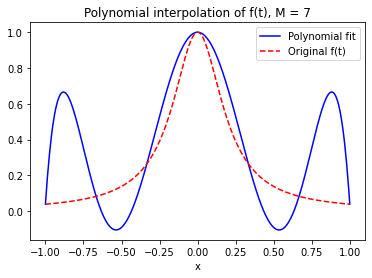

In [131]:
for M in np.arange(3, 22, step=2):
    # Form system
    x = np.linspace(-1, 1, M)
    y = f_runge(x)

    X = np.zeros((M,M))
    for i in np.arange(M):
        X[:,i] = x ** i
        
    # Solve for ahat
    U, S, Vt = np.linalg.svd(X)
    R = 5
    ahat =  np.linalg.inv(X) @ y
    
    # Compute error
    XX = np.zeros((xx.size,M))
    for i in np.arange(M):
        XX[:,i] = xx ** i
    yy = XX @ ahat
    error.append(np.trapz( (ff-yy)**2, xx))

# Optimal M
Mopt = 2 * np.argmin(error) + 3    

# Plot results for optimal M
M = Mopt
x = np.linspace(-1, 1, M)
y = f_runge(x)

X = np.zeros((M,M))
for i in np.arange(M):
    X[:,i] = x ** i
    
ahat = np.linalg.inv(X) @ y

XX = np.zeros((xx.size,M))
for i in np.arange(M):
    XX[:,i] = xx ** i

yy = XX @ ahat

plt.clf()
plt.plot(xx, yy, 'b')
plt.plot(xx, ff, 'r--' )
plt.xlabel('x')
plt.title('Polynomial interpolation of f(t), M = {}'.format(M))
plt.legend(('Polynomial fit','Original f(t)'))


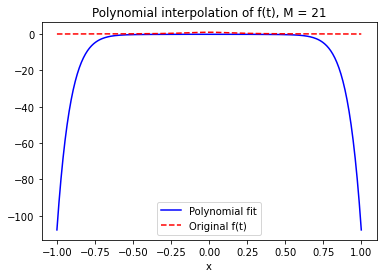

In [191]:
# Question 4(b)
# Define function
f_runge = lambda x: 1/(1 + 25 * x**2) 

# Define comparison
xx = np.linspace(-1, 1, 300)
ff = f_runge(xx)

error = []

# Plot results for M = 21
M = 21
x = np.linspace(-1, 1, M)
y = f_runge(x)

X = np.zeros((M,M))
for i in np.arange(M):
    X[:,i] = x ** i
    
U, S, Vt = np.linalg.svd(X)
delta = 10** -6
ahat =  np.linalg.inv(np.square(S * np.eye(M)) + delta * np.eye(M)) @ (S * np.eye(M)) @ np.transpose(U) @ y

XX = np.zeros((xx.size,M))
for i in np.arange(M):
    XX[:,i] = xx ** i

yy = XX @ ahat

plt.clf()
plt.plot(xx, yy, 'b')
plt.plot(xx, ff, 'r--' )
plt.xlabel('x')
plt.title('Polynomial interpolation of f(t), M = {}'.format(M))
plt.legend(('Polynomial fit','Original f(t)'))
# delta = 10^-6 seems to be the closest to the function towards the origin
# the polynomial appears to change far more drastically traveling away from the origin and generally looks flatter than
# in a